#                  ***The Digital Shift: Analyzing Trends in Book Publishing and Library Visits***

# TEAM 9

1.   Harsh Chavva
2.   Nandini Gunda
3.   Anusha Pogaku


#EXPLORATORY DATA ANALYSIS

## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

## Read the data

In [ ]:
files = {
    2018: "2018LibraryDataset.csv",
    2019: "2019LibraryDataset.csv",
    2020: "2020LibraryDataset.csv",
    2021: "2021LibraryDataset.csv",
    2022: "2022LibraryDataset.csv",
    2023: "2023LibraryDataset.csv"
}


dfs = []
for year, path in files.items():
    df = pd.read_csv(path)
    df["Year"] = year
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

## Delete the first row and display the top 5 rows

In [ ]:
df.head()

,Library Name,Legal Service Area (Population Assignment),Start of Local Fiscal Year (LFY),End of Local Fiscal Year (LFY),Mail City,Library Phone,Total Staff Expenditures,Print Material Expenditures,Electronic Material Expenditures,City/Library District Capital Revenue,...,Annual Circulation: All Other Ages Physical Items,Annual Circulation: All Other Ages Digital Items,Total Annual Circulation,Public Internet Computers Available,Number of Public Internet Computers,Annual Number of Computer Uses,Annual Website Visits,Annual Number of Public Service Hours,Annual Number Public Service Weeks,Year
0,Abilene Public Library,"1,21,885",10-01-2017,9/30/2018,Abilene,3256772474,"$1,713,668","$206,098","$216,728","$2,778,520",...,"3,59,044","1,99,460","8,05,401",Yes,70,"88,955","1,99,835","3,156",52.0,2018
1,Shackelford County Library,"3,328",01-01-2018,12/31/2018,Albany,3257622672,"$11,123","$1,143","$1,500",$0,...,"2,663",114,"3,646",Yes,11,"1,341",0,"1,459",51.0,2018
2,Anson Public Library,"2,310",01-01-2018,12/31/2018,Anson,3258232711,"$9,626","$3,244",$0,"$9,000",...,"1,061",0,"1,448",Yes,5,"1,500",0,"1,479",52.0,2018
3,Stonewall County Library,"1,388",10-01-2017,9/30/2018,Aspermont,9409892730,"$23,928","$3,359","$1,500",$0,...,877,"2,055","4,546",Yes,8,343,0,"1,248",52.0,2018
4,Callahan County Library,"3,301",10-01-2017,9/30/2018,Baird,3258545875,"$10,967",$717,$0,$442,...,435,0,656,Yes,2,504,0,781,46.0,2018


In [ ]:
merged_file_path = "merged_library_dataset.csv"
df.to_csv(merged_file_path, index=False)

## Check for Missing values

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Missing Values:
 Library Name                                           1
Legal Service Area (Population Assignment)           687
Start of Local Fiscal Year (LFY)                     688
End of Local Fiscal Year (LFY)                       688
Mail City                                              1
Library Phone                                          1
Total Staff Expenditures                             688
Print Material Expenditures                          688
Electronic Material Expenditures                     688
City/Library District Capital Revenue                688
Total Capital Revenue                                688
Electronically Searchable  Catalog                   688
1% of Collection Published in Last Five Years?       688
Books in Print                                       687
Physical Audio Items                                 687
E-books                                              688
E-Audio                                              688
Total Collecti

In [ ]:
# Assuming df is your DataFrame
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Library Name                                          0.025994
Legal Service Area (Population Assignment)           17.858071
Start of Local Fiscal Year (LFY)                     17.884066
End of Local Fiscal Year (LFY)                       17.884066
Mail City                                             0.025994
Library Phone                                         0.025994
Total Staff Expenditures                             17.884066
Print Material Expenditures                          17.884066
Electronic Material Expenditures                     17.884066
City/Library District Capital Revenue                17.884066
Total Capital Revenue                                17.884066
Electronically Searchable  Catalog                   17.884066
1% of Collection Published in Last Five Years?       17.884066
Books in Print                                       17.858071
Physical Audio Items                                 17.858071
E-books                                              17

## Rename the columns

In [ ]:
new_column_names = {
    "ID": "ID",
    "Library Name": "Library_Name",
    "Legal Service Area (Population Assignment)": "Legal_Service_Area_Population",
    "Start of Local Fiscal Year (LFY)": "Fiscal_Year_Start",
    "End of Local Fiscal Year (LFY)": "Fiscal_Year_End",
    "Mail City": "Mailing_City",
    "►Library Phone": "Library_Phone",
    "Total Staff Expenditures": "Total_Staff_Expenditures",
    "Print Material Expenditures": "Print_Material_Expenditures",
    "Electronic Material Expenditures": "Electronic_Material_Expenditures",
    "City/Library District Capital Revenue": "City_Library_District_Capital_Revenue",
    "Total Capital Revenue": "Total_Capital_Revenue",
    "►Electronically Searchable  Catalog": "Catalog_Searchable_Electronically",
    "► 1% of Collection Published in Last Five Years?": "Recent_Publication",
    "Books in Print": "Books_in_Print",
    "Physical Audio Items": "Physical_Audio_Items",
    "E-books": "EBooks",
    "E-Audio": "E_Audio",
    "►Total Collection Items": "Total_Collection_Items",
    "Annual Library Visits": "Annual_Visits",
    "Registered Library Users": "Registered_Users",
    "Annual Circulation: All Other Ages Physical Items": "Physical_Circulation_All_Ages",
    "Annual Circulation: All Other Ages Digital Items": "Digital_Circulation_All_Ages",
    "Total Annual Circulation": "Total_Circulation",
    "►Public Internet Computers Available": "Public_Internet_Computers_Available",
    "Number of Public Internet Computers": "Number_of_Public_Computers",
    "Annual Number of Computer Uses": "Annual_Computer_Uses",
    "Annual Website Visits": "Website_Visits",
    "Annual Number of Public Service Hours": "Annual_Public_Service_Hours",
    "Annual Number Public Servic Weeks": "Annual_Public_Service_Weeks"
}

# Rename the columns in the DataFrame
df.rename(columns=new_column_names, inplace=True)
print(df.head())

                 Library_Name Legal_Service_Area_Population Fiscal_Year_Start  \
0      Abilene Public Library                      1,21,885        10-01-2017   
1  Shackelford County Library                         3,328        01-01-2018   
2        Anson Public Library                         2,310        01-01-2018   
3    Stonewall County Library                         1,388        10-01-2017   
4     Callahan County Library                         3,301        10-01-2017   

  Fiscal_Year_End Mailing_City Library Phone Total_Staff_Expenditures  \
0       9/30/2018      Abilene    3256772474               $1,713,668   
1      12/31/2018       Albany    3257622672                  $11,123   
2      12/31/2018        Anson    3258232711                   $9,626   
3       9/30/2018    Aspermont    9409892730                  $23,928   
4       9/30/2018        Baird    3258545875                  $10,967   

  Print_Material_Expenditures Electronic_Material_Expenditures  \
0       

In [ ]:
print(df.dtypes)

Library_Name                                       object
Legal_Service_Area_Population                      object
Fiscal_Year_Start                                  object
Fiscal_Year_End                                    object
Mailing_City                                       object
Library Phone                                      object
Total_Staff_Expenditures                           object
Print_Material_Expenditures                        object
Electronic_Material_Expenditures                   object
City_Library_District_Capital_Revenue              object
Total_Capital_Revenue                              object
Electronically Searchable  Catalog                 object
1% of Collection Published in Last Five Years?     object
Books_in_Print                                     object
Physical_Audio_Items                               object
EBooks                                             object
E_Audio                                            object
Total Collecti

In [ ]:
date_cols = ['Fiscal_Year_Start', 'Fiscal_Year_End']  # list of columns to convert

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce', infer_datetime_format=True)

<ipython-input-8-b3ac65ac72a6>:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[col] = pd.to_datetime(df[col], errors='coerce', infer_datetime_format=True)
<ipython-input-8-b3ac65ac72a6>:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[col] = pd.to_datetime(df[col], errors='coerce', infer_datetime_format=True)


In [ ]:
print(df.dtypes)

Library_Name                                              object
Legal_Service_Area_Population                             object
Fiscal_Year_Start                                 datetime64[ns]
Fiscal_Year_End                                   datetime64[ns]
Mailing_City                                              object
Library Phone                                             object
Total_Staff_Expenditures                                  object
Print_Material_Expenditures                               object
Electronic_Material_Expenditures                          object
City_Library_District_Capital_Revenue                     object
Total_Capital_Revenue                                     object
Electronically Searchable  Catalog                        object
1% of Collection Published in Last Five Years?            object
Books_in_Print                                            object
Physical_Audio_Items                                      object
EBooks                   

## Get Numerical Data from the dataset

In [ ]:
df = df.replace({'\$': '', ',': '', ' ': ''}, regex=True)
df = df.apply(pd.to_numeric, errors='ignore')
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", numerical_columns)

Numerical Columns: ['Legal_Service_Area_Population', 'Fiscal_Year_Start', 'Fiscal_Year_End', 'Total_Staff_Expenditures', 'Print_Material_Expenditures', 'Electronic_Material_Expenditures', 'City_Library_District_Capital_Revenue', 'Total_Capital_Revenue', 'Books_in_Print', 'Physical_Audio_Items', 'EBooks', 'E_Audio', 'Total Collection Items', 'Annual_Visits', 'Registered_Users', 'Physical_Circulation_All_Ages', 'Digital_Circulation_All_Ages', 'Total_Circulation', 'Number_of_Public_Computers', 'Annual_Computer_Uses', 'Website_Visits', 'Annual_Public_Service_Hours', 'Annual Number Public Service Weeks', 'Year']


<ipython-input-10-0ea1c087ac7f>:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [ ]:
import pandas as pd

cols = [
    "Total_Staff_Expenditures",
    "Print_Material_Expenditures",
    "Electronic_Material_Expenditures",
    "City_Library_District_Capital_Revenue",
    "Total_Capital_Revenue"
]

for col in cols:
    df[col] = df[col].astype(str).str.replace('$', ' ', regex=False)

print(df[cols].head())


  Total_Staff_Expenditures Print_Material_Expenditures  \
0                1713668.0                    206098.0   
1                  11123.0                      1143.0   
2                   9626.0                      3244.0   
3                  23928.0                      3359.0   
4                  10967.0                       717.0   

  Electronic_Material_Expenditures City_Library_District_Capital_Revenue  \
0                         216728.0                             2778520.0   
1                           1500.0                                   0.0   
2                              0.0                                9000.0   
3                           1500.0                                   0.0   
4                              0.0                                 442.0   

  Total_Capital_Revenue  
0             2803912.0  
1               27036.0  
2               10965.0  
3               45493.0  
4               13213.0  


In [ ]:
import pandas as pd

for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            # If conversion fails, the column likely contains non-numeric text
            pass

# After conversion, you can list all numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", numerical_columns)


Numerical Columns: ['Legal_Service_Area_Population', 'Fiscal_Year_Start', 'Fiscal_Year_End', 'Books_in_Print', 'Physical_Audio_Items', 'EBooks', 'E_Audio', 'Total Collection Items', 'Annual_Visits', 'Registered_Users', 'Physical_Circulation_All_Ages', 'Digital_Circulation_All_Ages', 'Total_Circulation', 'Number_of_Public_Computers', 'Annual_Computer_Uses', 'Website_Visits', 'Annual_Public_Service_Hours', 'Annual Number Public Service Weeks', 'Year']


In [ ]:
df.head()

,Library_Name,Legal_Service_Area_Population,Fiscal_Year_Start,Fiscal_Year_End,Mailing_City,Library Phone,Total_Staff_Expenditures,Print_Material_Expenditures,Electronic_Material_Expenditures,City_Library_District_Capital_Revenue,...,Physical_Circulation_All_Ages,Digital_Circulation_All_Ages,Total_Circulation,Public Internet Computers Available,Number_of_Public_Computers,Annual_Computer_Uses,Website_Visits,Annual_Public_Service_Hours,Annual Number Public Service Weeks,Year
0,AbilenePublicLibrary,121885.0,1506816000000000000,1538265600000000000,Abilene,3256772474,1713668.0,206098.0,216728.0,2778520.0,...,359044.0,199460.0,805401.0,Yes,70.0,88955.0,199835.0,3156.0,52.0,2018
1,ShackelfordCountyLibrary,3328.0,1514764800000000000,1546214400000000000,Albany,3257622672,11123.0,1143.0,1500.0,0.0,...,2663.0,114.0,3646.0,Yes,11.0,1341.0,0.0,1459.0,51.0,2018
2,AnsonPublicLibrary,2310.0,1514764800000000000,1546214400000000000,Anson,3258232711,9626.0,3244.0,0.0,9000.0,...,1061.0,0.0,1448.0,Yes,5.0,1500.0,0.0,1479.0,52.0,2018
3,StonewallCountyLibrary,1388.0,1506816000000000000,1538265600000000000,Aspermont,9409892730,23928.0,3359.0,1500.0,0.0,...,877.0,2055.0,4546.0,Yes,8.0,343.0,0.0,1248.0,52.0,2018
4,CallahanCountyLibrary,3301.0,1506816000000000000,1538265600000000000,Baird,3258545875,10967.0,717.0,0.0,442.0,...,435.0,0.0,656.0,Yes,2.0,504.0,0.0,781.0,46.0,2018


## Check for duplicate values

In [ ]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 0


## Summary of the dataset

In [ ]:
df.describe()

,Legal_Service_Area_Population,Fiscal_Year_Start,Fiscal_Year_End,Books_in_Print,Physical_Audio_Items,EBooks,E_Audio,Total Collection Items,Annual_Visits,Registered_Users,Physical_Circulation_All_Ages,Digital_Circulation_All_Ages,Total_Circulation,Number_of_Public_Computers,Annual_Computer_Uses,Website_Visits,Annual_Public_Service_Hours,Annual Number Public Service Weeks,Year
count,3.154000e+03,3.154000e+03,3.154000e+03,3.154000e+03,3154.000000,3.154000e+03,3.154000e+03,3.154000e+03,3.154000e+03,3.154000e+03,3.154000e+03,3.154000e+03,3.154000e+03,3154.000000,3154.000000,3.154000e+03,3154.000000,3154.000000,3154.000000
mean,5.052543e+04,-1.954920e+17,1.614001e+18,6.607774e+04,3158.789474,4.040499e+04,2.126726e+04,1.391207e+05,8.529156e+04,2.699685e+04,7.523818e+04,3.760762e+04,1.958538e+05,34.881420,12808.842422,1.047143e+05,1971.581484,47.368104,2020.469880
std,1.891973e+05,4.007623e+18,2.004882e+17,1.879126e+05,10880.898337,1.169533e+05,2.702754e+05,4.270880e+05,2.889248e+05,1.198336e+05,3.138639e+05,2.236584e+05,7.931044e+05,131.297455,46056.140919,9.768087e+05,687.522069,8.985481,1.711664
min,0.000000e+00,-9.223372e+18,-9.223372e+18,0.000000e+00,0.000000,-1.000000e+00,-1.000000e+00,1.932000e+03,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-4.000000e+00,0.000000,-1.000000,-1.000000e+00,0.000000,0.000000,2018.000000
25%,4.267500e+03,1.506816e+18,1.569802e+18,1.623825e+04,357.250000,4.807500e+03,2.985000e+02,3.169250e+04,7.424750e+03,2.236750e+03,4.447250e+03,1.277500e+02,9.069750e+03,7.000000,1020.000000,0.000000e+00,1542.250000,47.000000,2019.000000
50%,9.671500e+03,1.546301e+18,1.609373e+18,2.601900e+04,830.500000,1.641800e+04,3.531000e+03,5.382900e+04,2.051100e+04,5.455500e+03,1.159400e+04,2.205500e+03,2.476750e+04,12.000000,2891.000000,0.000000e+00,1996.000000,52.000000,2020.000000
75%,2.946575e+04,1.633046e+18,1.664496e+18,4.803325e+04,1984.000000,2.976350e+04,8.062000e+03,9.622125e+04,5.932825e+04,1.409200e+04,3.531450e+04,1.082950e+04,8.421125e+04,23.000000,8614.500000,1.282375e+04,2385.750000,52.000000,2022.000000
max,2.325502e+06,1.696118e+18,1.703981e+18,3.844970e+06,187306.000000,2.624800e+06,1.479942e+07,1.614220e+07,5.292965e+06,2.116017e+06,6.486982e+06,5.316947e+06,1.349632e+07,3097.000000,709694.000000,2.557232e+07,4940.000000,57.000000,2023.000000


## Check for the missing values now

In [ ]:
df = df.dropna()

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

Library_Name                                      0
Legal_Service_Area_Population                     0
Fiscal_Year_Start                                 0
Fiscal_Year_End                                   0
Mailing_City                                      0
Library Phone                                     0
Total_Staff_Expenditures                          0
Print_Material_Expenditures                       0
Electronic_Material_Expenditures                  0
City_Library_District_Capital_Revenue             0
Total_Capital_Revenue                             0
Electronically Searchable  Catalog                0
1% of Collection Published in Last Five Years?    0
Books_in_Print                                    0
Physical_Audio_Items                              0
EBooks                                            0
E_Audio                                           0
Total Collection Items                            0
Annual_Visits                                     0
Registered_U

## Drop duplicates

In [ ]:
df.drop_duplicates(inplace=True)

## Check for any constant columns

In [ ]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Constant Columns:", constant_columns)

Constant Columns: []


# DATA VISUALIZATIONS

## Time Series Analysis
### Graph between Time and Circulation Count

<ipython-input-19-b840f0008342>:11: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  time_data = df[value_cols].resample(freq).sum()


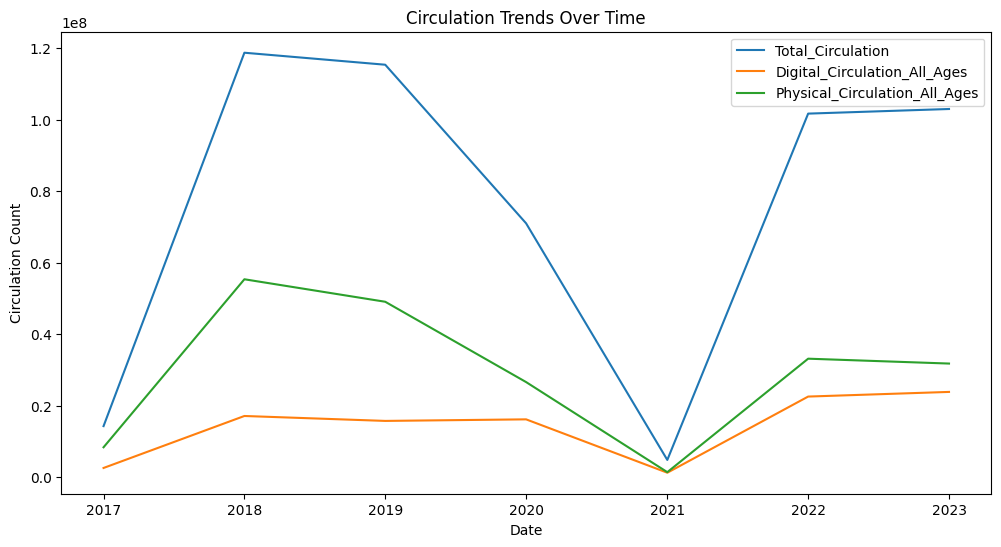

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multi_line_time_series(df, start_col, end_col, value_cols, freq='AS'):
    df[start_col] = pd.to_datetime(df[start_col], errors='coerce')
    df[end_col] = pd.to_datetime(df[end_col], errors='coerce')
    df['Mid_Date'] = df[start_col] + (df[end_col] - df[start_col]) / 2
    df.set_index('Mid_Date', inplace=True)
    df.columns = df.columns.str.strip()
    time_data = df[value_cols].resample(freq).sum()


    plt.figure(figsize=(12, 6))
    for col in value_cols:
          sns.lineplot(x=time_data.index, y=time_data[col], label=col)
    plt.title("Circulation Trends Over Time")
    plt.xlabel("Date")
    plt.ylabel("Circulation Count")
    plt.legend()
    plt.show()
    df.reset_index(inplace=True)

plot_multi_line_time_series(df, start_col="Fiscal_Year_Start", end_col="Fiscal_Year_End",
                            value_cols=["Total_Circulation", "Digital_Circulation_All_Ages", "Physical_Circulation_All_Ages"],
                            freq='AS')

In [ ]:
pip install squarify

## Interactive Treemap between Total Circulation & Cities in Texas

In [ ]:
import pandas as pd
import plotly.express as px

city_agg = df.groupby("Mailing_City", as_index=False)["Total_Circulation"].sum()

city_agg = city_agg.sort_values("Total_Circulation", ascending=False)

if len(city_agg) > 50:
    top_50 = city_agg.head(50).copy()
    others_sum = city_agg.iloc[50:]["Total_Circulation"].sum()
    others_row = pd.DataFrame([{"Mailing_City": "Others", "Total_Circulation": others_sum}])
    top_50 = pd.concat([top_50, others_row], ignore_index=True)
else:
    top_50 = city_agg

fig = px.treemap(
    top_50,
    path=["Mailing_City"],
    values="Total_Circulation",
    title="Treemap of Total Circulation by Mailing City"
)

fig.update_traces(textinfo="label+value")
fig.show()

## Check for Categorical Data

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Library_Name', 'Mailing_City', 'Library Phone', 'Total_Staff_Expenditures', 'Print_Material_Expenditures', 'Electronic_Material_Expenditures', 'City_Library_District_Capital_Revenue', 'Total_Capital_Revenue', 'Electronically Searchable  Catalog', '1% of Collection Published in Last Five Years?', 'Public Internet Computers Available']


## Histograms for Categorical Data

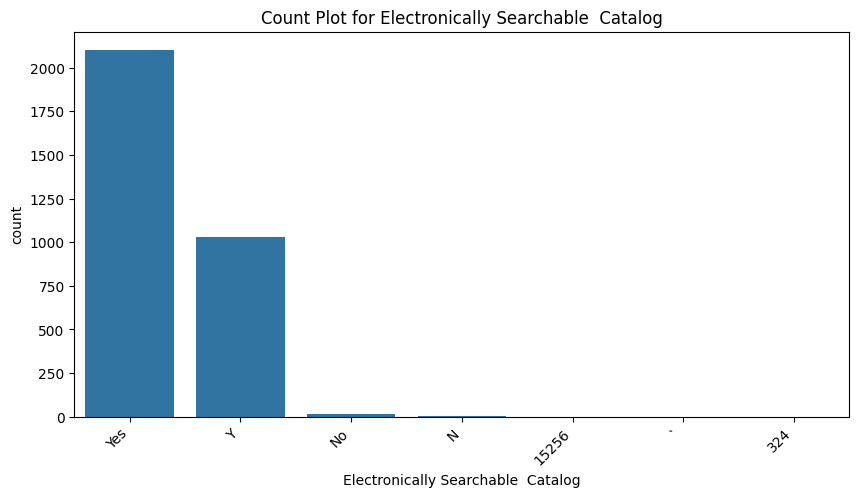

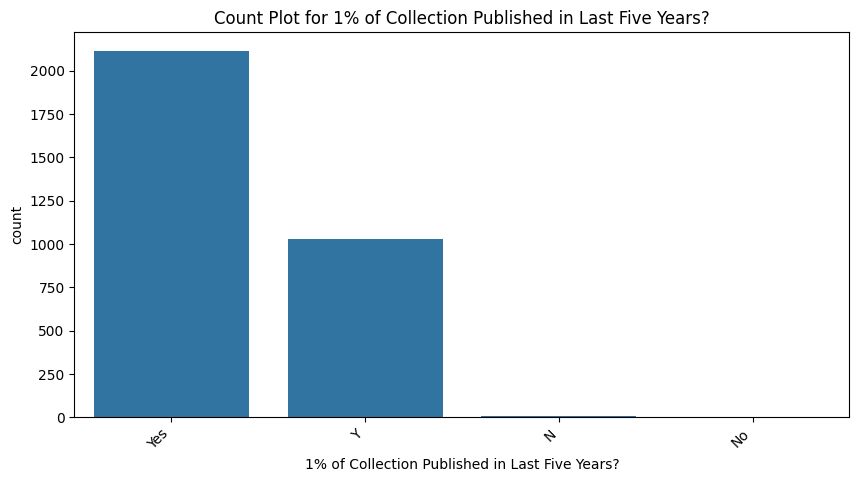

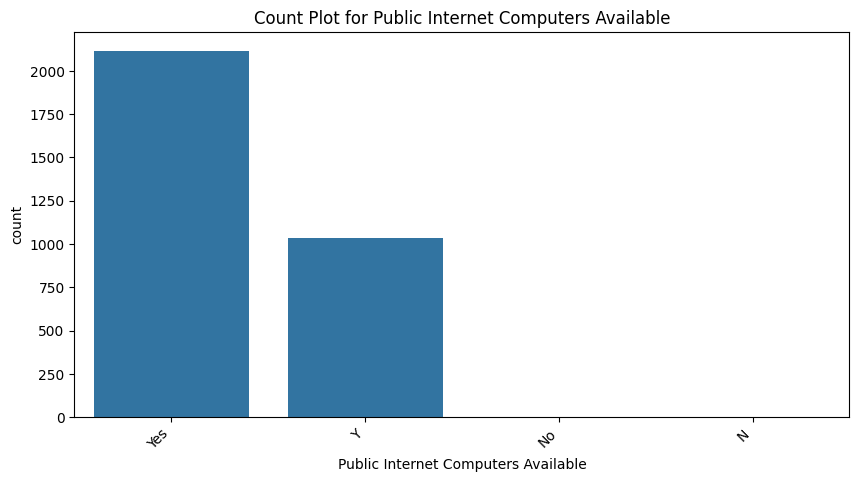

In [ ]:
def plot_categorical_counts(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        if df[col].nunique() > 20:
            continue
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.xticks(rotation=45, ha='right')
        plt.title(f"Count Plot for {col}")
        plt.show()

plot_categorical_counts(df)


## Frequency Table for Categorical Columns

In [ ]:
def plot_categorical_counts(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        unique_values = df[col].nunique()
        if unique_values == 1:
            print(f"{col}: Only one unique value - {df[col].unique()[0]}")
        elif unique_values > 20:
            continue
        else:
            value_counts = df[col].value_counts()
            print(f"\nFrequency Table for {col}:")
            print(value_counts.to_string())

plot_categorical_counts(df)


Frequency Table for Electronically Searchable  Catalog:
Electronically Searchable  Catalog
Yes      2101
Y        1030
No         16
N           4
15256       1
`           1
324         1

Frequency Table for 1% of Collection Published in Last Five Years?:
1% of Collection Published in Last Five Years?
Yes    2117
Y      1029
N         5
No        3

Frequency Table for Public Internet Computers Available:
Public Internet Computers Available
Yes    2118
Y      1033
No        2
N         1


## Check for Numerical Data

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", numerical_columns)


Numerical Columns: ['Legal_Service_Area_Population', 'Fiscal_Year_Start', 'Fiscal_Year_End', 'Books_in_Print', 'Physical_Audio_Items', 'EBooks', 'E_Audio', 'Total Collection Items', 'Annual_Visits', 'Registered_Users', 'Physical_Circulation_All_Ages', 'Digital_Circulation_All_Ages', 'Total_Circulation', 'Number_of_Public_Computers', 'Annual_Computer_Uses', 'Website_Visits', 'Annual_Public_Service_Hours', 'Annual Number Public Service Weeks', 'Year']


## Histograms for Numeric Values

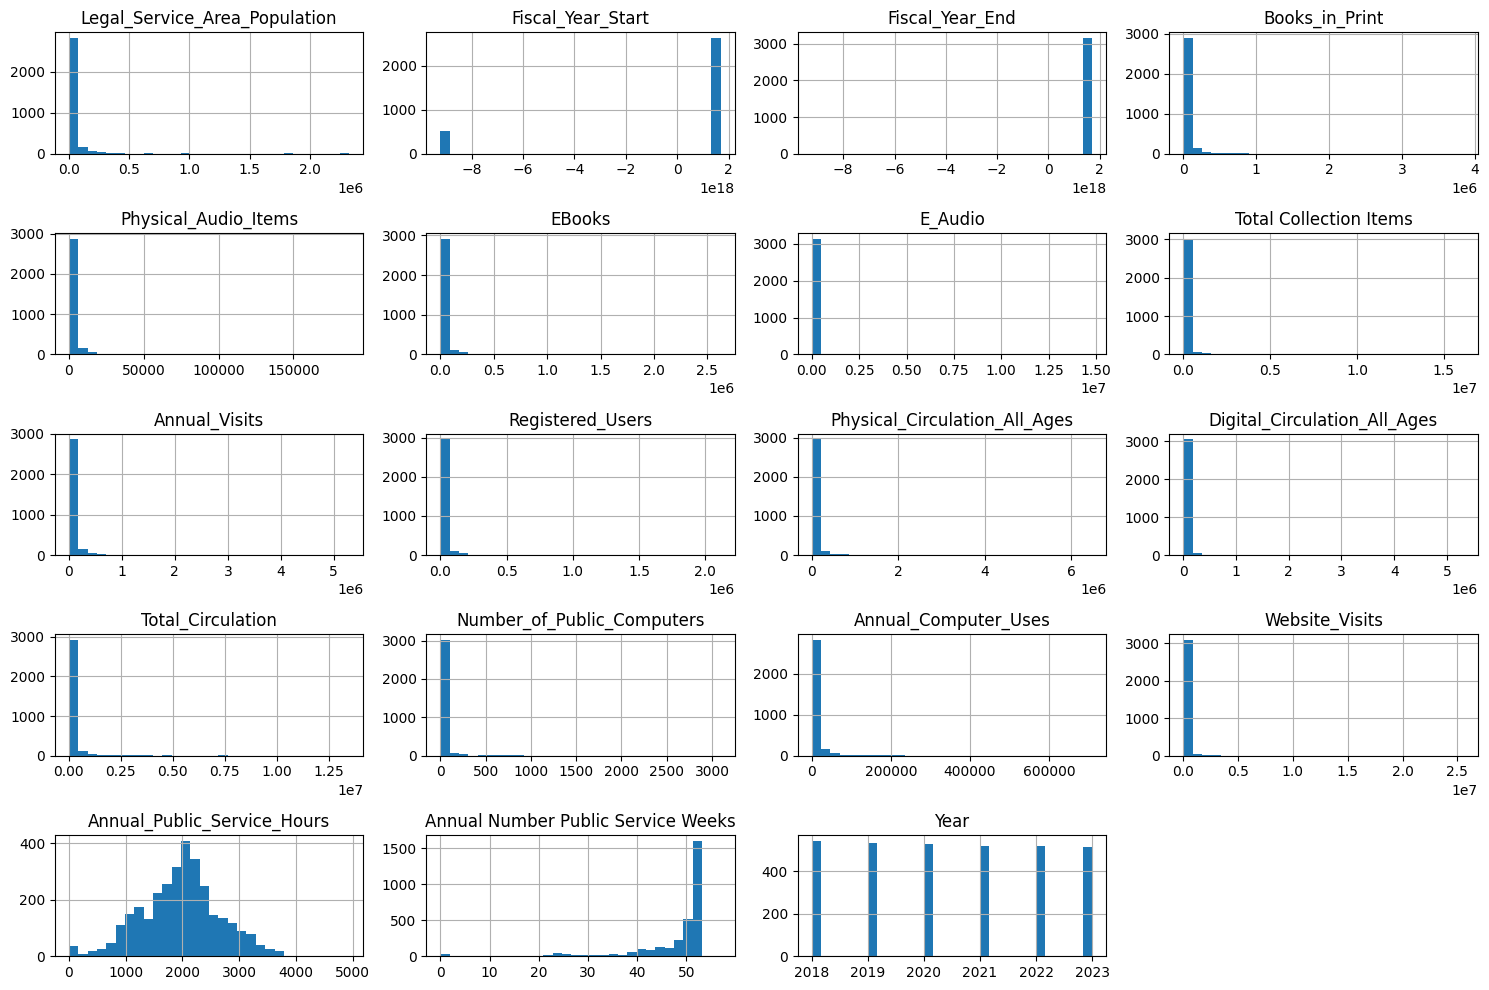

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numeric_histograms(df):
    """
    Plots histograms for all numeric columns in the DataFrame.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols].hist(bins=30, figsize=(15, 10))
    plt.tight_layout()
    plt.show()

plot_numeric_histograms(df)


## Bivariate Analysis

### ScatterPlot

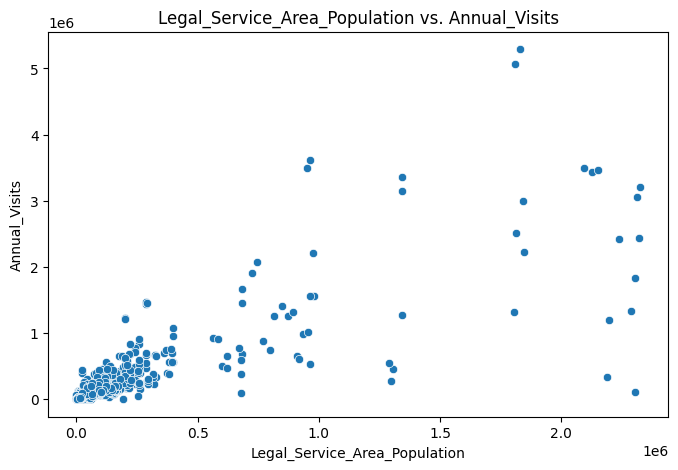

In [ ]:
def plot_scatter(df, x_col, y_col):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f"{x_col} vs. {y_col}")
    plt.show()


plot_scatter(df, "Legal_Service_Area_Population", "Annual_Visits")


## Outliers Detection

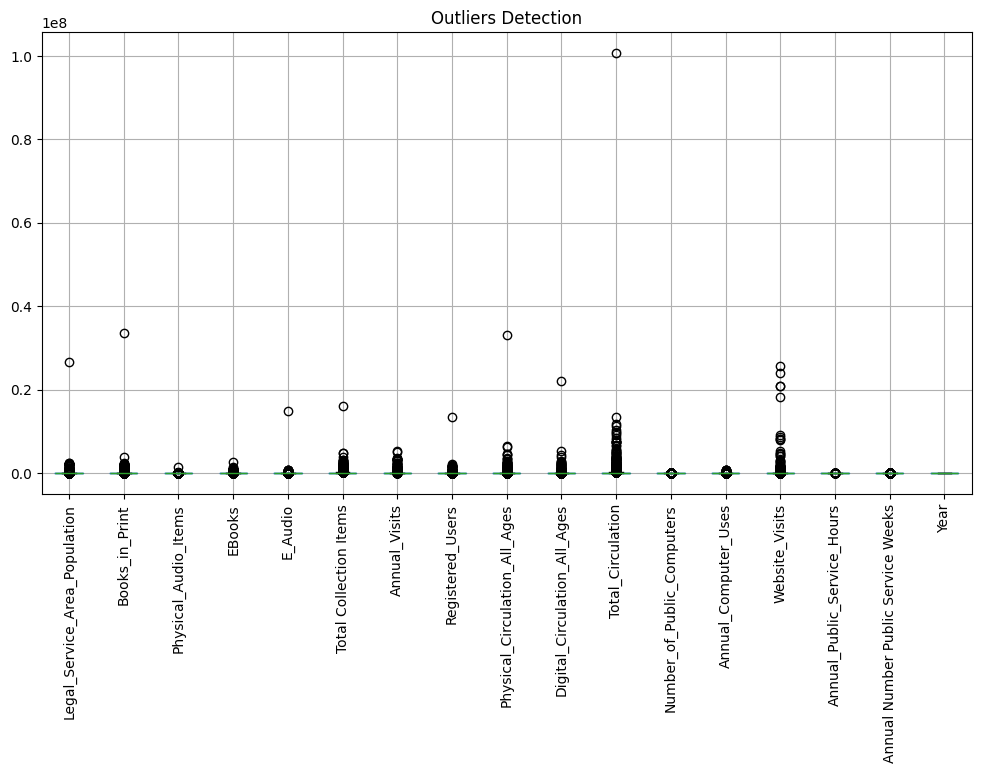

In [ ]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=90)
plt.title("Outliers Detection")
plt.show()

## Handling Outliers

In [ ]:
def cap_outliers_iqr_all_columns(df, multiplier=1.5):
    df_capped = df.copy()
    numeric_cols = df_capped.select_dtypes(include='number').columns

    for col in numeric_cols:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        df_capped[col] = df_capped[col].clip(lower_bound, upper_bound)

    return df_capped

df = cap_outliers_iqr_all_columns(df, multiplier=1.5)


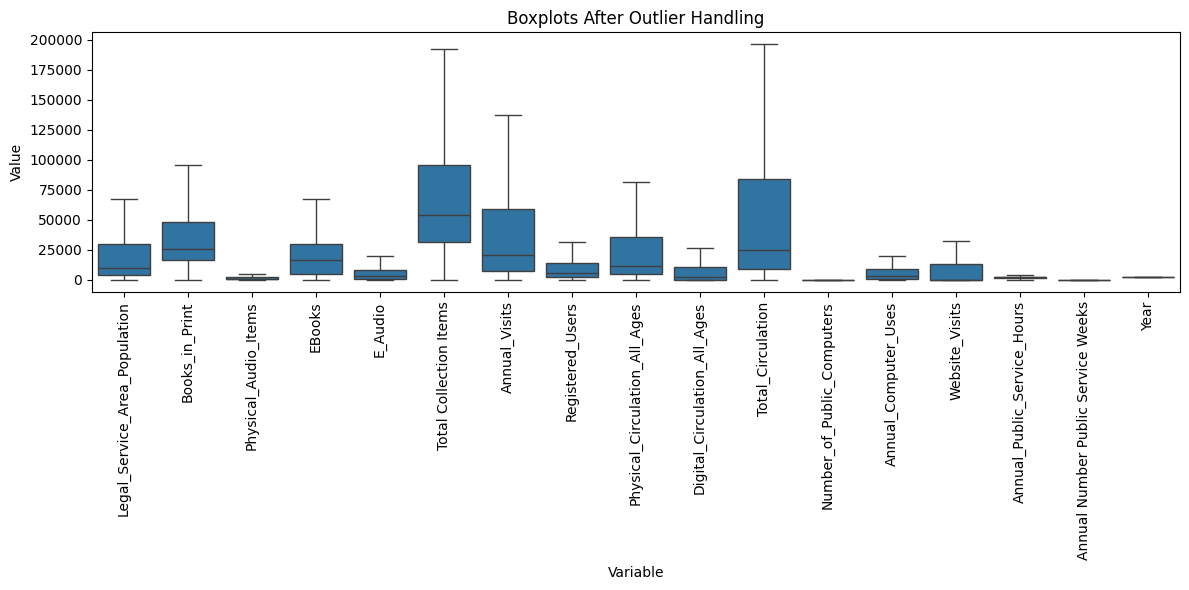

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all_boxplots(df):
    numeric_cols = df.select_dtypes(include='number').columns
    df_melted = df[numeric_cols].melt(var_name='Variable', value_name='Value')

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Variable', y='Value', data=df_melted)
    plt.xticks(rotation=90)
    plt.title("Boxplots After Outlier Handling")
    plt.tight_layout()
    plt.show()

plot_all_boxplots(df)


## PCA (Principal Component Analysis)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

numeric_features = df.select_dtypes(include=[np.number]).drop(columns=["Year"], errors='ignore')

rows_with_all_nan = numeric_features.isna().all(axis=1)

numeric_features = numeric_features[~rows_with_all_nan]

numeric_features = numeric_features.dropna()

if numeric_features.shape[0] > 0:
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(numeric_features)
    print("Explained Variance Ratio:", pca.explained_variance_ratio_)
else:
    print("Error: No valid data for PCA after handling missing values.")

Explained Variance Ratio: [0.85584003 0.07839024]


## Correlation Heatmap

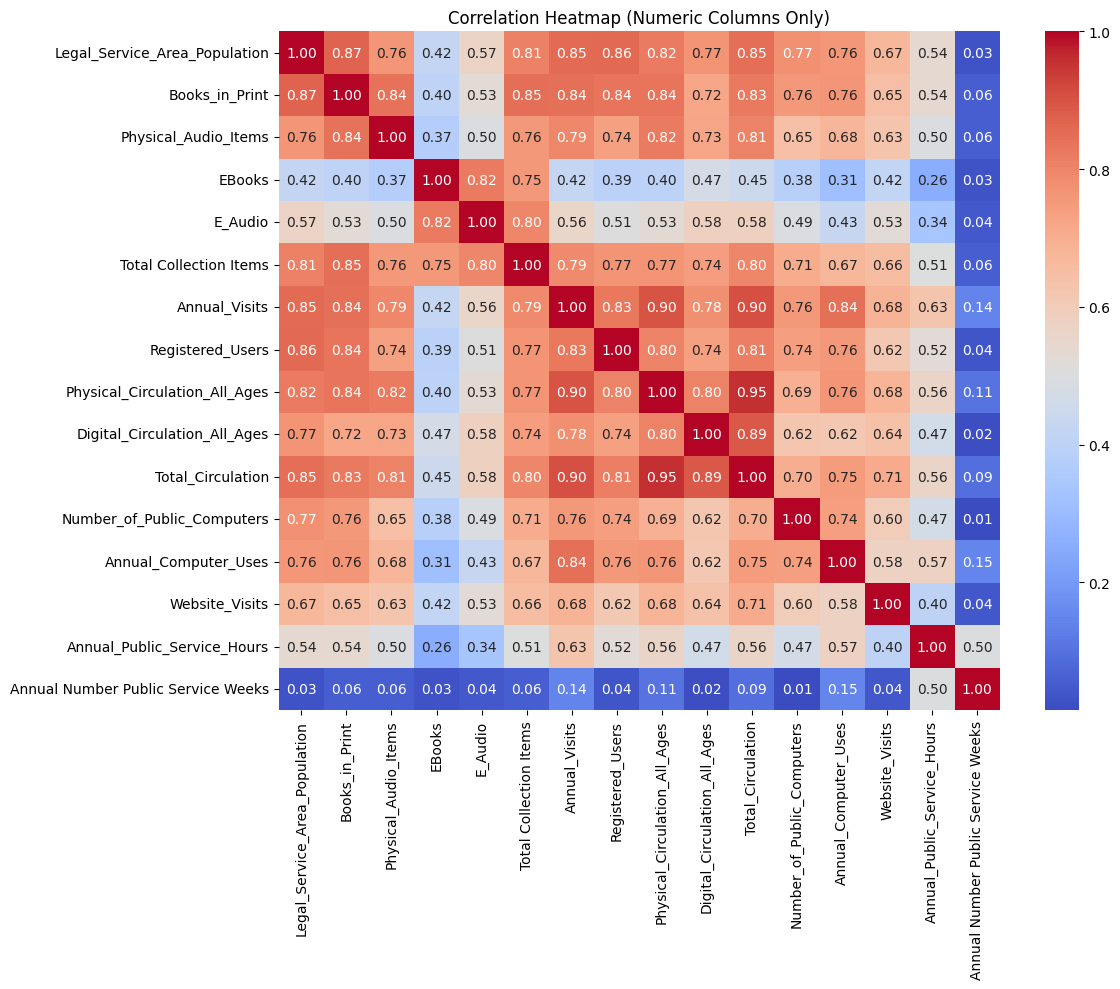

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include=[np.number]).copy()
columns_to_exclude = ["ID", "Year","Library_Name", "Fiscal_Year_Start","Fiscal_Year_End","Mailing_City","Library_Phone"]
numeric_df = numeric_df.drop(columns=columns_to_exclude, errors='ignore')
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.tight_layout()
plt.show()


# DATA MODELS

## Q1: How has the shift toward digital reading (e.g., eBooks) impacted physical book circulation and library visits, and what trends can we expect from 2024 to 2026?

### Time-Series Model

In [ ]:
!pip install prophet
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj6quthbn/g6qqdwvu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj6quthbn/fl5reu7j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17640', 'data', 'file=/tmp/tmpj6quthbn/g6qqdwvu.json', 'init=/tmp/tmpj6quthbn/fl5reu7j.json', 'output', 'file=/tmp/tmpj6quthbn/prophet_modelv0yedp58/prophet_model-20250502164203.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:42:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:42:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

Books Model Accuracy Metrics:
Mean Absolute Error: 1556719.59
Root Mean Squared Error: 1966087.15
Mean Absolute Percentage Error: 14.35%
Books Predictions: [16312766.23221528  2141362.59241994]
Actual Books: [19070370  2497198]

eBooks Model Accuracy Metrics:
Mean Absolute Error: 1227885.74
Root Mean Squared Error: 1497169.53
Mean Absolute Percentage Error: 14.51%
eBooks Predictions: [13523178.02958817  2000000.        ]
Actual eBooks: [15607692.75  2371256.75]

Visits Model Accuracy Metrics:
Mean Absolute Error: 2934236.00
RMSE-Root Mean Squared Error: 3814657.93
Mean Absolute Percentage Error: 25.05%
Visits Predictions: [15915602.00651854  1500000.        ]
Actual Visits: [21287434.  1996640.]


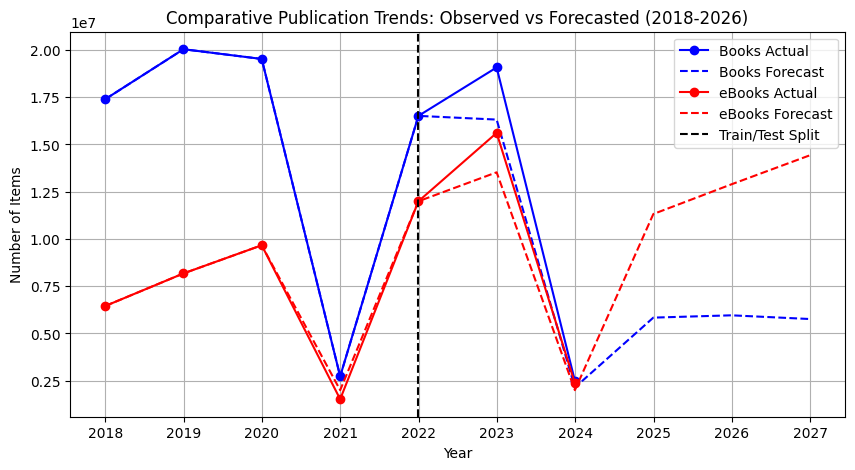

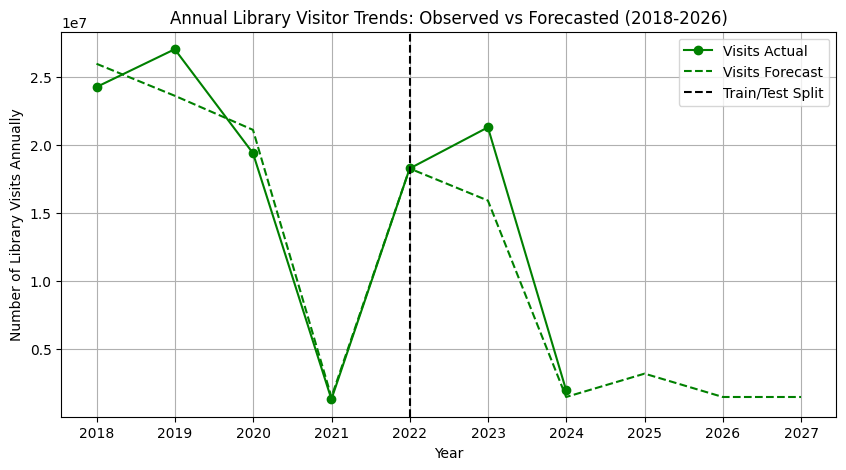

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Prepare and Transform Data for Forecasting
df = pd.DataFrame({
    'Fiscal_Year_Start': pd.to_datetime(['2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31',
                                         '2021-12-31', '2022-12-31', '2023-12-31']),
    'Books_in_Print': [17391170, 20034780, 19519520, 2730624, 16508760, 19070370, 2497198],
    'EBooks': [6451569.25, 8175128.00, 9664142.75, 1520122.50, 11991598.50, 15607692.75, 2371256.75],
    'Annual_Visits': [24247084.0, 27020311.0, 19391998.0, 1336353.0, 18268242.0, 21287434.0, 1996640.0]
})

# Resample Annually
annual_sums = df.set_index('Fiscal_Year_Start')[['Books_in_Print', 'EBooks', 'Annual_Visits']].resample('YE').sum()
data = annual_sums.reset_index().rename(columns={'Fiscal_Year_Start': 'ds', 'Books_in_Print': 'books_y', 'EBooks': 'ebooks_y', 'Annual_Visits': 'visits_y'})

# Add Regressors
data['anomaly_books'] = [0, 0, 0, 1, 0, 0, 1.0]
data['anomaly_ebooks'] = [0, 0, 0, 1, 0, 0, 1.5]
data['anomaly_visits'] = [0, 0, 0, 1, 0, 0, 0.8]  # Reduced to 0.8
data['peak'] = [0, 0, 0, 0, 0, 1, 0]

# Train/Test Split
train_books = data[data['ds'] <= '2021-12-31'][['ds', 'books_y', 'anomaly_books', 'peak']].rename(columns={'books_y': 'y'})
test_books = data[data['ds'] >= '2022-12-31'][['ds', 'books_y', 'anomaly_books', 'peak']].rename(columns={'books_y': 'y'})

train_ebooks = data[data['ds'] <= '2021-12-31'][['ds', 'ebooks_y', 'anomaly_ebooks', 'peak']].rename(columns={'ebooks_y': 'y'})
test_ebooks = data[data['ds'] >= '2022-12-31'][['ds', 'ebooks_y', 'anomaly_ebooks', 'peak']].rename(columns={'ebooks_y': 'y'})

train_visits = data[data['ds'] <= '2021-12-31'][['ds', 'visits_y', 'anomaly_visits', 'peak']].rename(columns={'visits_y': 'y'})
test_visits = data[data['ds'] >= '2022-12-31'][['ds', 'visits_y', 'anomaly_visits', 'peak']].rename(columns={'visits_y': 'y'})

# Books Forecasting Model
model_books = Prophet(growth='linear', changepoint_prior_scale=0.2, n_changepoints=3, yearly_seasonality=True)
model_books.add_regressor('anomaly_books', prior_scale=5.0)
model_books.add_regressor('peak', prior_scale=5.0)
model_books.fit(train_books)

# eBooks Forecasting  Model
model_ebooks = Prophet(growth='linear', changepoint_prior_scale=0.3, n_changepoints=3, yearly_seasonality=True)
model_ebooks.add_regressor('anomaly_ebooks', prior_scale=10.0)
model_ebooks.add_regressor('peak', prior_scale=15.0)
model_ebooks.fit(train_ebooks)

# Library Visits Forecasting Model
model_visits = Prophet(growth='linear', changepoint_prior_scale=0.3, n_changepoints=3, yearly_seasonality=True)
model_visits.add_regressor('anomaly_visits', prior_scale=10.0)
model_visits.add_regressor('peak', prior_scale=20.0)
model_visits.fit(train_visits)

# Predict on test datasets for each model
test_books_pred = model_books.predict(test_books)
test_ebooks_pred = model_ebooks.predict(test_ebooks)
test_ebooks_pred['yhat'] = test_ebooks_pred['yhat'].apply(lambda x: max(2000000, x))
test_visits_pred = model_visits.predict(test_visits)
test_visits_pred['yhat'] = test_visits_pred['yhat'].apply(lambda x: max(1500000, x))

# Accuracy Metrics Computation
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Books Forecast Accuracy Metrics
actual_books = test_books['y'].values
predicted_books = test_books_pred['yhat'].values
mae_books = mean_absolute_error(actual_books, predicted_books)
rmse_books = np.sqrt(mean_squared_error(actual_books, predicted_books))
mape_books = mean_absolute_percentage_error(actual_books, predicted_books)

# eBooks Forecast Accuracy Metrics
actual_ebooks = test_ebooks['y'].values
predicted_ebooks = test_ebooks_pred['yhat'].values
mae_ebooks = mean_absolute_error(actual_ebooks, predicted_ebooks)
rmse_ebooks = np.sqrt(mean_squared_error(actual_ebooks, predicted_ebooks))
mape_ebooks = mean_absolute_percentage_error(actual_ebooks, predicted_ebooks)

# Library Visits Forecast Accuracy Metrics
actual_visits = test_visits['y'].values
predicted_visits = test_visits_pred['yhat'].values
mae_visits = mean_absolute_error(actual_visits, predicted_visits)
rmse_visits = np.sqrt(mean_squared_error(actual_visits, predicted_visits))
mape_visits = mean_absolute_percentage_error(actual_visits, predicted_visits)

# Print Results
print("Books Model Accuracy Metrics:")
print(f"Mean Absolute Error: {mae_books:.2f}\nRoot Mean Squared Error: {rmse_books:.2f}\nMean Absolute Percentage Error: {mape_books:.2f}%")
print("Books Predictions:", test_books_pred['yhat'].values)
print("Actual Books:", actual_books)

print("\neBooks Model Accuracy Metrics:")
print(f"Mean Absolute Error: {mae_ebooks:.2f}\nRoot Mean Squared Error: {rmse_ebooks:.2f}\nMean Absolute Percentage Error: {mape_ebooks:.2f}%")
print("eBooks Predictions:", test_ebooks_pred['yhat'].values)
print("Actual eBooks:", actual_ebooks)

print("\nVisits Model Accuracy Metrics:")
print(f"Mean Absolute Error: {mae_visits:.2f}\nRMSE-Root Mean Squared Error: {rmse_visits:.2f}\nMean Absolute Percentage Error: {mape_visits:.2f}%")
print("Visits Predictions:", test_visits_pred['yhat'].values)
print("Actual Visits:", actual_visits)


# Forecast for 2024–2026
future_books = model_books.make_future_dataframe(periods=5, freq='YE')
future_books['anomaly_books'] = future_books['ds'].apply(
    lambda x: 1.0 if x.year == 2023 else (0.5 if x.year in [2024, 2025, 2026] else (1 if x.year == 2020 else 0)))
future_books['peak'] = future_books['ds'].apply(lambda x: 1 if x.year == 2022 else 0)
forecast_books = model_books.predict(future_books)
forecast_books['yhat'] = forecast_books['yhat'].apply(lambda x: max(0, x))

future_ebooks = model_ebooks.make_future_dataframe(periods=5, freq='YE')
future_ebooks['anomaly_ebooks'] = future_ebooks['ds'].apply(
    lambda x: 1.5 if x.year == 2023 else (0.5 if x.year in [2024, 2025, 2026] else (1 if x.year == 2020 else 0)))
future_ebooks['peak'] = future_ebooks['ds'].apply(lambda x: 1 if x.year == 2022 else 0)
forecast_ebooks = model_ebooks.predict(future_ebooks)
forecast_ebooks['yhat'] = forecast_ebooks['yhat'].apply(lambda x: max(2000000, x))

future_visits = model_visits.make_future_dataframe(periods=5, freq='YE')
future_visits['anomaly_visits'] = future_visits['ds'].apply(
    lambda x: 0.8 if x.year == 2023 else (0.5 if x.year in [2024, 2025, 2026] else (1 if x.year == 2020 else 0)))
future_visits['peak'] = future_visits['ds'].apply(lambda x: 1 if x.year == 2022 else 0)
forecast_visits = model_visits.predict(future_visits)
forecast_visits['yhat'] = forecast_visits['yhat'].apply(lambda x: max(1500000, x))

# Graph 1: Book & eBook Trends
plt.figure(figsize=(10, 5))
plt.plot(data['ds'], data['books_y'], 'b-o', label='Books Actual')
plt.plot(forecast_books['ds'], forecast_books['yhat'], 'b--', label='Books Forecast')
plt.plot(data['ds'], data['ebooks_y'], 'r-o', label='eBooks Actual')
plt.plot(forecast_ebooks['ds'], forecast_ebooks['yhat'], 'r--', label='eBooks Forecast')
plt.axvline(x=pd.to_datetime('2021-12-31'), color='k', linestyle='--', label='Train/Test Split')
plt.title('Comparative Publication Trends: Observed vs Forecasted (2018-2026)')
plt.xlabel('Year')
plt.ylabel('Number of Items')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Library Attendance – Annual Visits: Historical vs Projected (2018-2026)
plt.figure(figsize=(10, 5))
plt.plot(data['ds'], data['visits_y'], 'g-o', label='Visits Actual')
plt.plot(forecast_visits['ds'], forecast_visits['yhat'], 'g--', label='Visits Forecast')
plt.axvline(x=pd.to_datetime('2021-12-31'), color='k', linestyle='--', label='Train/Test Split')
plt.title('Annual Library Visitor Trends: Observed vs Forecasted (2018-2026)')
plt.xlabel('Year')
plt.ylabel('Number of Library Visits Annually')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install contextily
!pip install mgwr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.2/388.2 kB 28.2 MB/s eta 0:00:00


## Q2: Can we classify libraries based on digital circulation levels using machine learning?


### Classification Model

,Model,Accuracy
0,Random Forest,0.865506
1,XGBoost,0.876582


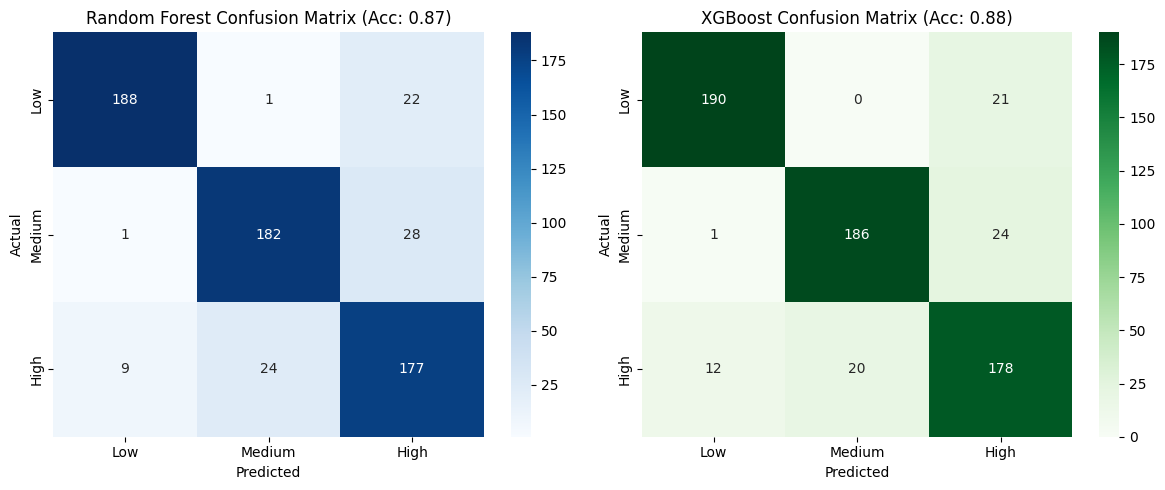

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv("merged_library_dataset.csv")

# Clean currency and numeric fields
currency_columns = [
    'Total Staff Expenditures', 'Print Material Expenditures',
    'Electronic Material Expenditures', 'City/Library District Capital Revenue'
]
for col in currency_columns:
    df[col] = df[col].replace('[\$,]', '', regex=True).replace(',', '', regex=True).astype(float)

numeric_columns = [
    'Annual Circulation: All Other Ages Physical Items',
    'Annual Circulation: All Other Ages Digital Items',
    'Total Annual Circulation',
    'Annual Library Visits',
    'Annual Website Visits',
    'Annual Number of Computer Uses'
]
for col in numeric_columns:
    df[col] = df[col].replace(',', '', regex=True).astype(float)

# Drop rows with missing target
df = df.dropna(subset=['Annual Circulation: All Other Ages Digital Items'])

# Bin target variable into categories
df['Circulation_Level'] = pd.qcut(
    df['Annual Circulation: All Other Ages Digital Items'],
    q=3,
    labels=["Low", "Medium", "High"]
)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['Annual Circulation: All Other Ages Digital Items', 'Circulation_Level'])
y = df['Circulation_Level']

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------------------
# 1. Random Forest with GridSearch
# -------------------------------
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred, output_dict=True)
rf_cm = confusion_matrix(y_test, rf_pred)

# -------------------------------
# 2. XGBoost Classifier
# -------------------------------

# Encode the target variable numerically
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred, output_dict=True)
xgb_cm = confusion_matrix(y_test, xgb_pred)

# Create report comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [rf_acc, xgb_acc]
})

display(comparison_df)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0],
            xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
axes[0].set_title(f"Random Forest Confusion Matrix (Acc: {rf_acc:.2f})")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Greens", ax=axes[1],
            xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
axes[1].set_title(f"XGBoost Confusion Matrix (Acc: {xgb_acc:.2f})")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


## Q3: Do Kindle sales correlate with total library circulation and visits?


### Regression Model

In [ ]:
book_sales_df = pd.read_csv('/content/Books_Data_Clean.csv')
kindle_sales_2023 = book_sales_df[book_sales_df['Publishing Year'] == 2023][book_sales_df['Publisher'] == 'Amazon Digital Services, Inc.']['gross sales'].sum()
total_kindle_sales = kindle_sales_2023

In [ ]:
df = pd.read_csv("/content/2023LibraryDataset.csv")
df['Legal Service Area (Population Assignment)'] = pd.to_numeric(df['Legal Service Area (Population Assignment)'].str.replace(',', ''), errors='coerce')
total_population = df['Legal Service Area (Population Assignment)'].sum()

df['Kindle_Sales'] = (df['Legal Service Area (Population Assignment)'] / total_population) * total_kindle_sales

for col in ['Total Annual Circulation', 'Annual Library Visits', 'E-books', 'Annual Circulation: All Other Ages Digital Items']:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

X = df[['Kindle_Sales', 'E-books', 'Annual Circulation: All Other Ages Digital Items']]
X = sm.add_constant(X)

y_circulation = df['Total Annual Circulation']
y_visits = df['Annual Library Visits']

# Model 1: Total Annual Circulation
model1 = sm.OLS(y_circulation, X).fit()

# Model 2: Annual Library Visits
model2 = sm.OLS(y_visits, X).fit()


print("Model 1: Impact of Kindle Sales on Total Annual Circulation")
print(model1.summary())
print("\nModel 2: Impact of Kindle Sales on Annual Library Visits")
print(model2.summary())

Model 1: Impact of Kindle Sales on Total Annual Circulation
                               OLS Regression Results                               
Dep. Variable:     Total Annual Circulation   R-squared:                       0.937
Model:                                  OLS   Adj. R-squared:                  0.937
Method:                       Least Squares   F-statistic:                     3814.
Date:                      Fri, 02 May 2025   Prob (F-statistic):          2.88e-308
Time:                              16:45:44   Log-Likelihood:                -7076.0
No. Observations:                       515   AIC:                         1.416e+04
Df Residuals:                           512   BIC:                         1.417e+04
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                                       coef    std err          t      P>|

### Model 1: Impact of Kindle Sales on Total Annual Circulation
#### Key Findings:
1. **R-squared = 0.937**: The model explains 93.7% of the variation in Total Annual Circulation, indicating an excellent fit.
2. **Coefficients and Significance**:
   - **Kindle_Sales**: Coefficient = 3.311e-16 (very small, positive), P-value = 0.000 (highly significant). This suggests that an increase in Kindle sales has a statistically significant but practically tiny positive effect on Total Annual Circulation.
   - **E-books**: Coefficient = 0.3436, P-value = 0.000 (significant). For each additional e-book available, circulation increases by about 0.34 transactions, a moderate effect.
   - **Annual Circulation: All Other Ages Digital Items**: Coefficient = 2.6986, P-value = 0.000 (highly significant). This variable has the strongest effect—each additional digital item circulated increases Total Annual Circulation by about 2.7 transactions.
   - **Constant**: 53,010 (significant), representing baseline circulation when all predictors are zero.
3. **Interpretation**:
   - Kindle sales have a negligible practical impact due to the tiny coefficient (3.311e-16), despite statistical significance. For example, even 1 million Kindle sales would increase circulation by only ~0.00033 transactions, which is trivial.
   - The availability of e-books and circulation of other digital items are far more influential drivers of library circulation.
4. **Diagnostics**:
   - **Omnibus and Jarque-Bera**: P-values = 0.000 indicate non-normal residuals, suggesting the model may not fully meet OLS assumptions (e.g., due to outliers or skewness).
   - **Durbin-Watson = 2.144**: Close to 2, indicating little autocorrelation in residuals (a good sign).
   - **Condition Number = inf**: Suggests potential multicollinearity or a singular design matrix, which could mean predictors are highly correlated or the data has issues (e.g., perfect collinearity).

#### What This Explains:
- Kindle sales have a statistically detectable but practically insignificant effect on library circulation. Libraries’ own digital offerings (e-books and other digital items) are much more critical to circulation volume.
- The high R-squared suggests that digital resources (both library-provided and external Kindle sales) collectively explain most of the variation in circulation, though Kindle’s contribution is minimal.

---

### Model 2: Impact of Kindle Sales on Annual Library Visits
#### Key Findings:
1. **R-squared = 0.727**: The model explains 72.7% of the variation in Annual Library Visits, a good but lower fit compared to Model 1.
2. **Coefficients and Significance**:
   - **Kindle_Sales**: Coefficient = 8.769e-17 (very small, positive), P-value = 0.000 (highly significant). Similar to Model 1, Kindle sales have a tiny positive effect on library visits.
   - **Annual Circulation: All Other Ages Digital Items**: Coefficient = 0.6707, P-value = 0.000 (highly significant). Each additional digital item circulated increases library visits by about 0.67, a substantial effect.
   - **Constant**: 47,370 (significant), the baseline number of visits when predictors are zero.
3. **Interpretation**:
   - Kindle sales again show a statistically significant but practically negligible effect (e.g., 1 million Kindle sales increase visits by ~0.000087, essentially zero).
   - Circulation of other digital items strongly drives library visits, while kindle book availability does not appear to influence physical visits.
4. **Diagnostics**:
   - **Omnibus and Jarque-Bera**: P-values = 0.000 indicate non-normal residuals, similar to Model 1, suggesting potential model misspecification.
   - **Durbin-Watson = 2.249**: Indicates minimal autocorrelation, which is good.
   - **Condition Number = inf**: Again flags potential multicollinearity or data issues.

#### What This Explains:
- Kindle sales have a minimal impact on library visits, while the circulation of other digital items is a key driver of physical library attendance.

